<a href="https://colab.research.google.com/github/zuzking/Reddit-comment-wallstreetbet/blob/main/wallstreetbets2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install tensorflow tensorflow-gpu pandas matplotlib sklearn

## Part 0: Load Packages, Load Data


In [ ]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english")
# Use nltk's English stopwords.
stopwords = nltk.corpus.stopwords.words('english')
stopwords.append("'s")
stopwords.append("'m")
stopwords.append("n't")
stopwords.append("br")

# customize stopwords 
custom_st = ['a','the', 'and', 'there', 'that', 'this', 'am', 'on',
                       'if', 'it', 'to', 'at' 'a', 'of', 'in', 'out', 'were',
                       'was', 'do', 'did', "don't","didn't", 'be', 'are', 'is',
                       'being', "it's", 'have', 'had', 's', 'j', 't', 're',
                       'at', 'with', 'just', 'now', "can't", 'can', 'up',
                       'as', 'from', 'thing', 'by', 'so', 'here', 'will', 'for',
                   '.', ',', '’', '?', '[', ']', '…', 'going', 'want', 'know', 'look', 
                   'would', 'said', 'got', 'think', 'say', 'tell', 'go', 'get', 
                    'crosstalk', 'well', 'like', 'much', 'make']
total_stop = stopwords + custom_st


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/drive/train.csv')
data = pd.read_csv('/content/drive/MyDrive/drive/reddit_wsb.csv')
data1 = pd.read_csv('/content/drive/MyDrive/drive/data_wsb.csv')
data_c = pd.read_csv('/content/drive/MyDrive/drive/data_c.csv')
data_wsb2 = pd.read_csv('/content/drive/MyDrive/drive/data_wsb2.csv')

##Part1: Data Manipulation and Data Exploration

In [ ]:
# concat comment body and title
data['body']= data['body'].fillna('')

data['title'] = data['title'].replace(np.nan, '')

data['total'] = data[['title', 'body']].agg('. '.join, axis=1) # concat title and body 


# deal with timestamp data
k = []
for i in data['timestamp']:
    j = i[:10]
    k.append(j)
    
kk=[]
for ii in data['timestamp']:
    jj = ii[-8:]
    kk.append(jj)

data['day'] = k
data['time'] = kk

#df['Courses'].astype(str) +"-"+ df["Duration"]

#data['total'] = data['title'].astype(str)+","+data['body'] 

#data = data[['title', 'body','total','timestamp','sentiment','comms_num','id']]

In [ ]:
data['timestamp'] = pd.to_datetime(data['timestamp'])
t1 = pd.to_datetime('2021-01-28', format = '%Y/%m/%d')
data['day'] =  pd.to_datetime(data['day'], format = '%Y/%m/%d')

In [ ]:
data.head()

,title,score,id,url,comms_num,created,body,timestamp,total,day,time
0,"It's not about the money, it's about sending a...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,,2021-01-28 21:37:41,"It's not about the money, it's about sending a...",2021-01-28,21:37:41
1,Math Professor Scott Steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,,2021-01-28 21:32:10,Math Professor Scott Steiner says the numbers ...,2021-01-28,21:32:10
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35,Exit the system. The CEO of NASDAQ pushed to h...,2021-01-28,21:30:35
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,,2021-01-28 21:28:57,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,2021-01-28,21:28:57
4,"Not to distract from GME, just thought our AMC...",71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,,2021-01-28 21:26:56,"Not to distract from GME, just thought our AMC...",2021-01-28,21:26:56


In [ ]:
# remove outlier which coule be a typo 
data['day'].describe()
data = data.drop(labels = 32591, axis = 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


Text(0.5, 1.0, 'Number of comments before data processing')

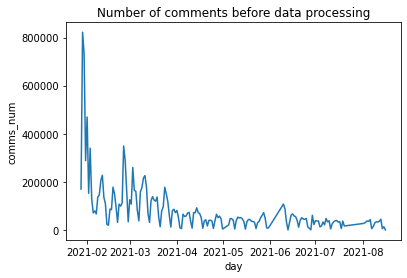

In [ ]:
comments_num = data.groupby(['day'])['comms_num'].sum()
sns.lineplot(data = comments_num)
plt.title('Number of comments before data processing')

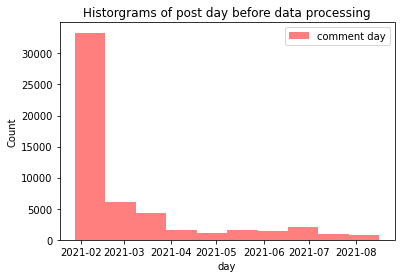

In [ ]:
plt.hist(data['day'].values, alpha = 0.5, color='r', label = 'comment day')
plt.legend(loc ='upper right')
plt.title('Historgrams of post day before data processing')
plt.xlabel('day')
plt.ylabel('Count')
plt.show()

Diamond hands, Paper hands? YOLO?

In [ ]:
# Identity key words

diamond_hand = ['Diamond Hands', 'Diamond hands', 'diamond hand','diamondhands','Diamondhands'] # ,'diamond','Diamond' ? should i put them in?
paper_hand = ['Paper Hands', 'Paper hands', 'paper hands','paperhands','Paperhands']
yolo = ['YOLO', 'yolo', 'Yolo']

def id_words(comment, keys):
    flag = 0 
    for key in keys:
        if comment.find(key) != -1:
            flag = 1
    return flag

data['diamond_label'] = data['total'].apply(lambda x: id_words(x, diamond_hand))
data['yolo_label'] = data['total'].apply(lambda x: id_words(x, yolo))
data['paper_label'] =  data['total'].apply(lambda x: id_words(x, paper_hand))

In [ ]:
#data_wsb2['diamond_label'] = data_wsb2['total'].apply(lambda x: id_words(x, diamond_hand))
#data_wsb2['yolo_label'] = data_wsb2['total'].apply(lambda x: id_words(x, yolo))
#data_wsb2['paper_label'] =  data_wsb2['total'].apply(lambda x: id_words(x, paper_hand))

In [ ]:
data['diamond_label'].sum()

1514

In [ ]:
data['yolo_label'].sum()

3329

In [ ]:
data_wsb2['diamond_label'].sum()

1120

In [ ]:
diamond = data[data['diamond_label'] ==1].groupby(['day'])['title'].nunique()
yolo = data[data['yolo_label'] ==1].groupby(['day'])['title'].nunique()
paper = data[data['paper_label'] ==1].groupby(['day'])['title'].nunique()

In [ ]:
len(paper)

76

Text(0.5, 1.0, 'Number of YOLO label')

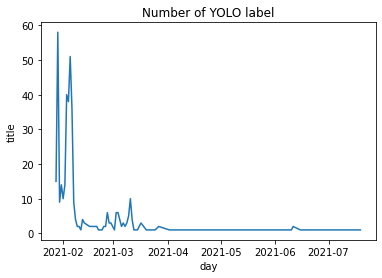

In [ ]:
sns.lineplot(data = paper)
plt.title('Number of YOLO label')

Text(0.5, 1.0, 'Number of Paper hands label')

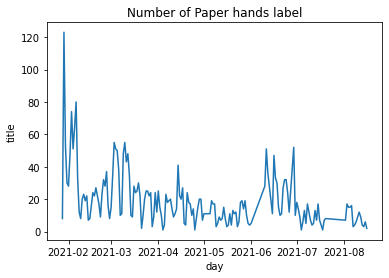

In [ ]:
sns.lineplot(data = yolo)
plt.title('Number of Paper hands label')

Text(0.5, 1.0, 'Number of Diamond hands label')

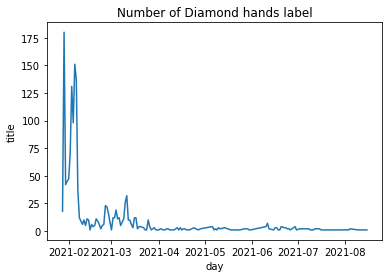

In [ ]:
#comments_num = .groupby(['day'])['comms_num'].sum()
sns.lineplot(data = diamond)
plt.title('Number of Diamond hands label')

## Part 2 Apply Bert Pretrained Model 

Install dependencies: to avoid the conflication between tensorflow and pytorch, the follosing bert related code is better to execut in a differet environment.

In [ ]:
# !pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/torch_stable.html

# !pip install transformers requests pandas numpy

'''
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch


tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

# test result 
tokens = tokenizer.encode("THIS IS THE MOMENT. Life isn't fair", return_tensors='pt')
result = model(tokens)
result.logits

def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

data['sentiment_total'] = data['title'].apply(lambda x: sentiment_score(x[:512]))

# werite to csv 
data.to_csv('data_wsb.csv')
'''

## Part 3: Training LSTM for Toxicity detection 
To train LSTM by using 90% train dataset and evaluate it's profermance on the 10% train dataset

Then deployed the LSTM model on wallstreetbets comments to detect toxic comments



In [ ]:
df = pd.read_csv('/content/drive/MyDrive/drive/train.csv')
#data = pd.read_csv('/content/drive/MyDrive/drive/reddit_wsb.csv')
#data = pd.read_csv('/content/drive/MyDrive/drive/data_wsb.csv')
#data_c = pd.read_csv('/content/drive/MyDrive/drive/data_c.csv')
#data_wsb2 = pd.read_csv('/content/drive/MyDrive/drive/data_wsb2.csv')

In [ ]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
from tensorflow.keras.layers import TextVectorization

In [ ]:
X = df['comment_text']
y = df[df.columns[2:]].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=22)

In [ ]:
MAX_FEATURES = 200000 # number of words in the vocab
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=1800,
                               output_mode='int')
vectorizer.adapt(X_train.values)

In [ ]:
vectorized_text = vectorizer(X_train.values)
#MCSHBAP - map, chache, shuffle, batch, prefetch  from_tensor_slices, list_file
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y_train))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) # helps bottlenecks

In [ ]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.3))
#test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

## Create Sequential Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [ ]:
model = Sequential()
# Create the embedding layer 
model.add(Embedding(MAX_FEATURES+1, 32))
# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(32, activation='tanh')))
# Feature extractor Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
# Final layer 
model.add(Dense(6, activation='sigmoid'))

In [ ]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          6400032   
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               16640     
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 256)               33024     
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 6)                 774       
                                                      

In [ ]:
history = model.fit(train, epochs=20, validation_data=val)

Epoch 1/20
6283/6283 [==============================] - 743s 118ms/step - loss: 0.0075 - val_loss: 0.0062
Epoch 2/20
6283/6283 [==============================] - 745s 119ms/step - loss: 0.0068 - val_loss: 0.0056
Epoch 3/20
6283/6283 [==============================] - 746s 119ms/step - loss: 0.0065 - val_loss: 0.0057
Epoch 4/20
6283/6283 [==============================] - 744s 118ms/step - loss: 0.0062 - val_loss: 0.0049
Epoch 5/20
6283/6283 [==============================] - 740s 118ms/step - loss: 0.0058 - val_loss: 0.0056
Epoch 6/20
6283/6283 [==============================] - 739s 118ms/step - loss: 0.0053 - val_loss: 0.0044
Epoch 7/20
6283/6283 [==============================] - 740s 118ms/step - loss: 0.0051 - val_loss: 0.0037
Epoch 8/20
6283/6283 [==============================] - 739s 118ms/step - loss: 0.0048 - val_loss: 0.0043
Epoch 9/20
6283/6283 [==============================] - 741s 118ms/step - loss: 0.0046 - val_loss: 0.0035
Epoch 10/20
6283/6283 [=======================

In [ ]:
model.save('toxicity3.h5')

In [ ]:
model = tf.keras.models.load_model('toxicity3.h5')

In [ ]:
from matplotlib import pyplot as plt

<Figure size 576x360 with 0 Axes>

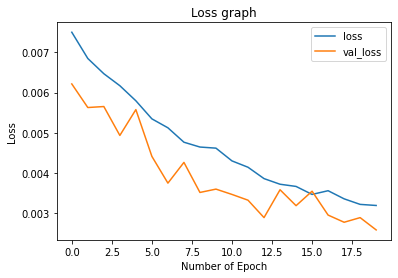

In [ ]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.xlabel('Number of Epoch')
plt.ylabel('Loss')
plt.title("Loss graph")
plt.show()

Test model

In [ ]:
input_text = vectorizer("I come back to you now... At the turn of the tide.. ")

In [ ]:
input_text

<tf.Tensor: shape=(1800,), dtype=int64, numpy=array([   7, 7158,  397, ...,    0,    0,    0])>

In [ ]:
model.predict(np.array([input_text]))

1/1 [==============================] - 5s 5s/step


array([[6.8497241e-01, 2.7910284e-05, 2.5040621e-02, 8.8541628e-06,
        2.6134802e-02, 1.0274887e-03]], dtype=float32)

In [ ]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [ ]:
def score(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)
    return results

In [ ]:
bb = []
for j in X_test:
    b = score(j)
    bb.append(b)

In [ ]:
bbb = list(np.concatenate(bb).flat)

b1 = np.array(bbb).reshape(15958,6)

b1 = pd.DataFrame(b1)

In [ ]:
b1.to_csv('b2.csv')

In [ ]:
b1.head()

,0,1,2,3,4,5
0,9.118920e-02,9.778071e-07,0.012503,4.921037e-03,0.000954,2.655410e-04
1,9.335384e-12,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00
2,8.438808e-19,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00
3,6.779801e-12,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00
4,9.956542e-01,7.480094e-04,0.880914,2.595362e-11,0.088501,5.927832e-09


## Measure LSTM model Performance 

In [ ]:
data_y = pd.DataFrame(y_test)
data_y.columns = df.columns[2:]
# Choose 0.5 as default threshold  

def judge(x):
    if x >=0.5:
        return 1
    else:
        return 0

In [ ]:
b1.columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate']

Calculate Accuracy, F1, precision, Recall... for different category 


In [ ]:
# we can measure these metrics by using the following code all the scores are over 90%

In [ ]:
b1['toxic']= b1['toxic'].apply(judge) 

y_te_toxic = data_y['toxic']
y_pred_toxic=b1['toxic']

from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

cm = confusion_matrix(y_te_toxic, y_pred_toxic)  

cmDF = pd.DataFrame(cm, columns=['pred_0', 'pred_1'], index=['true_0', 'true_1']) 
recall_r = float(cm[0,0]) / (cm[0,1] + cm[0,0])
precision_p = float(cm[0,0]) / (cm[0, 0] + cm[1,0])
f1_f = 2*recall_r*precision_p/(recall_r+precision_p)
acc_s = accuracy_score(y_te_toxic, y_pred_toxic)


In [ ]:
acc_s

0.933450307056022

## Part 4: Deploy LSTM Model on Wallstreetbets to discover 'toxic' comments



In [ ]:
aa=[]
for i in data['total']:
  a = score(i)
  aa.append(a)

aaa = list(np.concatenate(aa).flat)

a1 = np.array(aaa).reshape(53187,6)

a1 = pd.DataFrame(a1)

In [ ]:
aaa = list(np.concatenate(aa).flat)

a1 = np.array(aaa).reshape(53187,6)

a1 = pd.DataFrame(a1)

In [ ]:
a1.to_csv('a11.csv')

In [ ]:
def dig(x):
  if x >= 0.5:
    return 1
  else:
    return 0

In [ ]:
#a1 = a1.iloc[:,1:]
a1.columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate']

a1['toxic'] = a1['toxic'].apply(dig)
a1['severe_toxic'] = a1['severe_toxic'].apply(dig)
a1['obscene'] = a1['obscene'].apply(dig)
a1['threat'] = a1['threat'].apply(dig)
a1['insult'] = a1['insult'].apply(dig)
a1['identity_hate'] = a1['identity_hate'].apply(dig)

In [ ]:
a1.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


## Save result 

At this point, we could get the toxic comments user id

In [ ]:
data_c = pd.concat([data, a1], axis = 1)

#data_c = data_c.drop(labels = 32591, axis = 0)

In [ ]:
data_wsb2 = data_wsb2.iloc[:,2:]

In [ ]:
data_wsb2.head(50)

,title,body,total,timestamp,sentiment,comms_num,id,toxic,severe_toxic,obscene,threat,insult,identity_hate,vader_score,sentiment_total
0,"It's not about the money, it's about sending a...",NaN,"It's not about the money, it's about sending a...",2021-01-28 21:37:41,1,6,l6ulcx,0,0,0,0,0,0,0.0000,1
1,Math Professor Scott Steiner says the numbers ...,NaN,Math Professor Scott Steiner says the numbers ...,2021-01-28 21:32:10,2,23,l6uibd,0,0,0,0,0,0,-0.7034,2
2,Exit the system,The CEO of NASDAQ pushed to halt trading “to g...,Exit the system. The CEO of NASDAQ pushed to h...,2021-01-28 21:30:35,1,47,l6uhhn,0,0,0,0,1,0,-0.7644,1
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,NaN,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,2021-01-28 21:28:57,5,74,l6ugk6,0,0,0,0,0,0,-0.3397,5
4,"Not to distract from GME, just thought our AMC...",NaN,"Not to distract from GME, just thought our AMC...",2021-01-28 21:26:56,3,156,l6ufgy,0,0,0,0,0,0,0.2235,3
5,WE BREAKING THROUGH,NaN,WE BREAKING THROUGH.,2021-01-28 21:26:30,1,84,l6uf7d,0,0,0,0,0,0,0.0000,1
6,SHORT STOCK DOESN'T HAVE AN EXPIRATION DATE,Hedgefund whales are spreading disinfo saying ...,SHORT STOCK DOESN'T HAVE AN EXPIRATION DATE. H...,2021-01-28 21:26:27,2,53,l6uf6d,0,0,0,0,0,0,0.8663,2
7,THIS IS THE MOMENT,Life isn't fair. My mother always told me that...,THIS IS THE MOMENT. Life isn't fair. My mother...,2021-01-28 21:19:31,5,178,l6ub9l,0,0,0,0,0,0,-0.9949,5
8,Currently Holding AMC and NOK - Is it retarded...,NaN,Currently Holding AMC and NOK - Is it retarded...,2021-01-28 21:19:16,3,161,l6ub4i,0,0,0,0,1,0,-0.5719,3
9,I have nothing to say but BRUH I am speechless...,NaN,I have nothing to say but BRUH I am speechless...,2021-01-28 21:18:37,1,27,l6uas9,0,0,0,1,0,0,0.8625,1


## Part 5  VaderSentiment 

In [ ]:
#pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 14.9 MB/s 


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
data_c['vader_score'] = data_c['total'].apply(lambda s: vader_sentiment.polarity_scores(s)['compound'])

Save results

In [ ]:
data_c.to_csv('data_c.csv')

In [ ]:
data_c.head(20)

,Unnamed: 0,title,body,total,timestamp,sentiment,comms_num,id,toxic,severe_toxic,obscene,threat,insult,identity_hate,vader_score
0,0,"It's not about the money, it's about sending a...",NaN,"It's not about the money, it's about sending a...",2021-01-28 21:37:41,1,6,l6ulcx,0,0,0,0,0,0,0.0000
1,1,Math Professor Scott Steiner says the numbers ...,NaN,Math Professor Scott Steiner says the numbers ...,2021-01-28 21:32:10,2,23,l6uibd,0,0,0,0,0,0,-0.7034
2,2,Exit the system,The CEO of NASDAQ pushed to halt trading “to g...,Exit the system. The CEO of NASDAQ pushed to h...,2021-01-28 21:30:35,1,47,l6uhhn,0,0,0,0,1,0,-0.7644
3,3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,NaN,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,2021-01-28 21:28:57,5,74,l6ugk6,0,0,0,0,0,0,-0.3397
4,4,"Not to distract from GME, just thought our AMC...",NaN,"Not to distract from GME, just thought our AMC...",2021-01-28 21:26:56,3,156,l6ufgy,0,0,0,0,0,0,0.2235
5,5,WE BREAKING THROUGH,NaN,WE BREAKING THROUGH.,2021-01-28 21:26:30,1,84,l6uf7d,0,0,0,0,0,0,0.0000
6,6,SHORT STOCK DOESN'T HAVE AN EXPIRATION DATE,Hedgefund whales are spreading disinfo saying ...,SHORT STOCK DOESN'T HAVE AN EXPIRATION DATE. H...,2021-01-28 21:26:27,2,53,l6uf6d,0,0,0,0,0,0,0.8663
7,7,THIS IS THE MOMENT,Life isn't fair. My mother always told me that...,THIS IS THE MOMENT. Life isn't fair. My mother...,2021-01-28 21:19:31,5,178,l6ub9l,0,0,0,0,0,0,-0.9949
8,8,Currently Holding AMC and NOK - Is it retarded...,NaN,Currently Holding AMC and NOK - Is it retarded...,2021-01-28 21:19:16,3,161,l6ub4i,0,0,0,0,1,0,-0.5719
9,9,I have nothing to say but BRUH I am speechless...,NaN,I have nothing to say but BRUH I am speechless...,2021-01-28 21:18:37,1,27,l6uas9,0,0,0,1,0,0,0.8625


In [ ]:
data_c['pred_VADER'] = data_c['vader_score'].apply(lambda x: 1 if x >=0 else 0)

## Reload Data, now it has Bert pretrained sentiment score, Vader score and toxicity labels   

In [ ]:
data_wsb2 = data_wsb2.iloc[:,2:]
# deal with timestamp data
k = []
for i in data_wsb2['timestamp']:
    j = i[:10]
    k.append(j)
    
kk=[]
for ii in data_wsb2['timestamp']:
    jj = ii[-8:]
    kk.append(jj)

data_wsb2['day'] = k
data_wsb2['time'] = kk



diamond_hand = ['Diamond Hands', 'Diamond hands', 'diamond hand','diamondhands','Diamondhands'] # ,'diamond','Diamond' ? should i put them in?
paper_hand = ['Paper Hands', 'Paper hands', 'paper hands','paperhands','Paperhands']
yolo = ['YOLO', 'yolo', 'Yolo']

def id_words(comment, keys):
    flag = 0 
    for key in keys:
        if comment.find(key) != -1:
            flag = 1
    return flag


data_wsb2['diamond_label'] = data_wsb2['total'].apply(lambda x: id_words(x, diamond_hand))
data_wsb2['yolo_label'] = data_wsb2['total'].apply(lambda x: id_words(x, yolo))
data_wsb2['paper_label'] =  data_wsb2['total'].apply(lambda x: id_words(x, paper_hand))

In [ ]:
data_wsb2.head()

,title,body,total,timestamp,sentiment,comms_num,id,toxic,severe_toxic,obscene,threat,insult,identity_hate,vader_score,sentiment_total,diamond_label,yolo_label,paper_label,day,time
0,"It's not about the money, it's about sending a...",NaN,"It's not about the money, it's about sending a...",2021-01-28 21:37:41,1,6,l6ulcx,0,0,0,0,0,0,0.0000,1,0,0,0,2021-01-28,21:37:41
1,Math Professor Scott Steiner says the numbers ...,NaN,Math Professor Scott Steiner says the numbers ...,2021-01-28 21:32:10,2,23,l6uibd,0,0,0,0,0,0,-0.7034,2,0,0,0,2021-01-28,21:32:10
2,Exit the system,The CEO of NASDAQ pushed to halt trading “to g...,Exit the system. The CEO of NASDAQ pushed to h...,2021-01-28 21:30:35,1,47,l6uhhn,0,0,0,0,1,0,-0.7644,1,0,0,0,2021-01-28,21:30:35
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,NaN,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,2021-01-28 21:28:57,5,74,l6ugk6,0,0,0,0,0,0,-0.3397,5,0,0,0,2021-01-28,21:28:57
4,"Not to distract from GME, just thought our AMC...",NaN,"Not to distract from GME, just thought our AMC...",2021-01-28 21:26:56,3,156,l6ufgy,0,0,0,0,0,0,0.2235,3,0,0,0,2021-01-28,21:26:56


Text(0.5, 1.0, 'Daily mean of Bert Score')

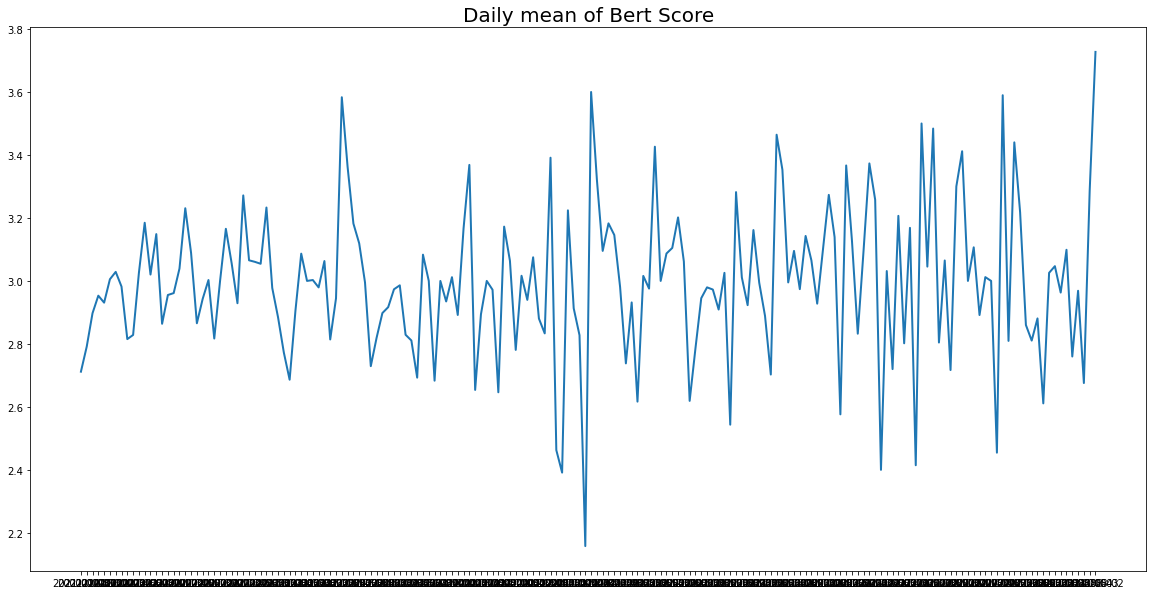

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)
x = data_wsb2['day'].unique()
y_bert_score = data_wsb2.groupby(['day'])['sentiment_total'].mean()
plt.plot(x, y_bert_score, label = "bert",linewidth=2)
plt.title('Daily mean of Bert Score', fontsize = 20) # 1 is negative, 5 is positive

Text(0.5, 1.0, 'Daily Mean of Vader Socre')

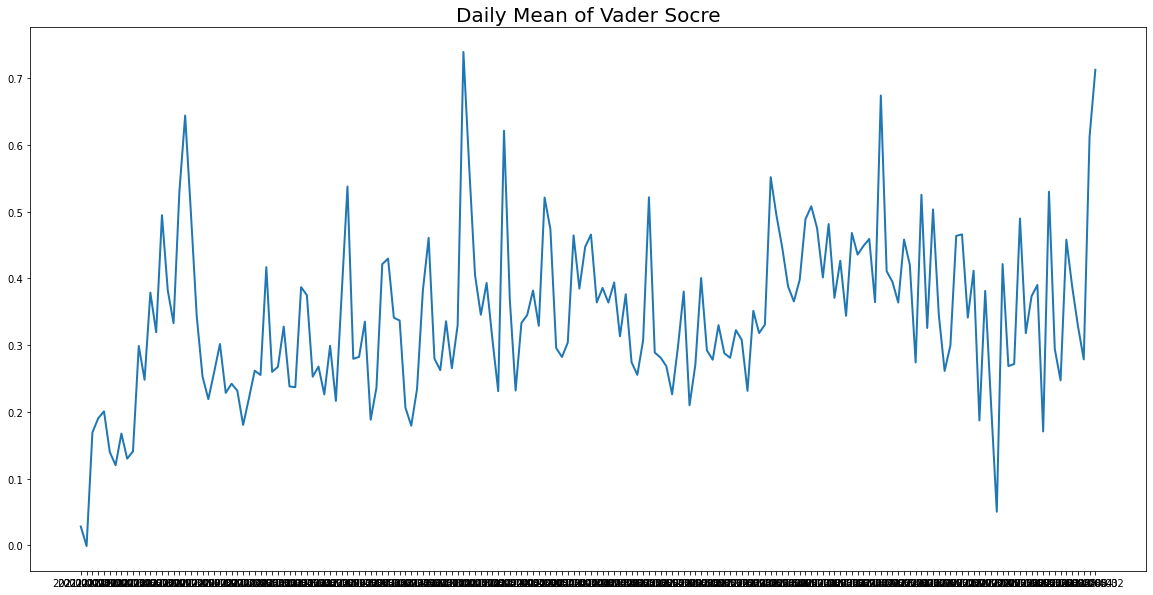

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)
#x = data_wsb2['day'].unique()
y_vader_score = data_wsb2.groupby(['day'])['vader_score'].mean()
plt.plot(x, y_vader_score, label = "vader",linewidth=2)
plt.title('Daily Mean of Vader Socre', fontsize = 20)  # lower score means negative 

In [ ]:
toxic = data_wsb2[data_wsb2['toxic']==1]
severe_toxic = data_wsb2[data_wsb2['severe_toxic']==1]
obscene = data_wsb2[data_wsb2['obscene']==1]
threat = data_wsb2[data_wsb2['threat']==1]
insult = data_wsb2[data_wsb2['insult']==1]
identity_hate = data_wsb2[data_wsb2['identity_hate']==1]

In [ ]:
toxic['toxic'].sum()

7944

In [ ]:
x = data_wsb2['day'].unique()
y_toxic = data_wsb2.groupby(['day'])['toxic'].sum().values.tolist()
y_severe_toxic = data_wsb2.groupby(['day'])['severe_toxic'].sum().values.tolist()
y_obscene =  data_wsb2.groupby(['day'])['obscene'].sum().values.tolist()
y_insult = data_wsb2.groupby(['day'])['insult'].sum().values.tolist()
y_identity_hate = data_wsb2.groupby(['day'])['identity_hate'].sum().values.tolist()

In [ ]:
len(y_severe_toxic)

176

Text(0.5, 1.0, 'Toxicity Comments Detection')

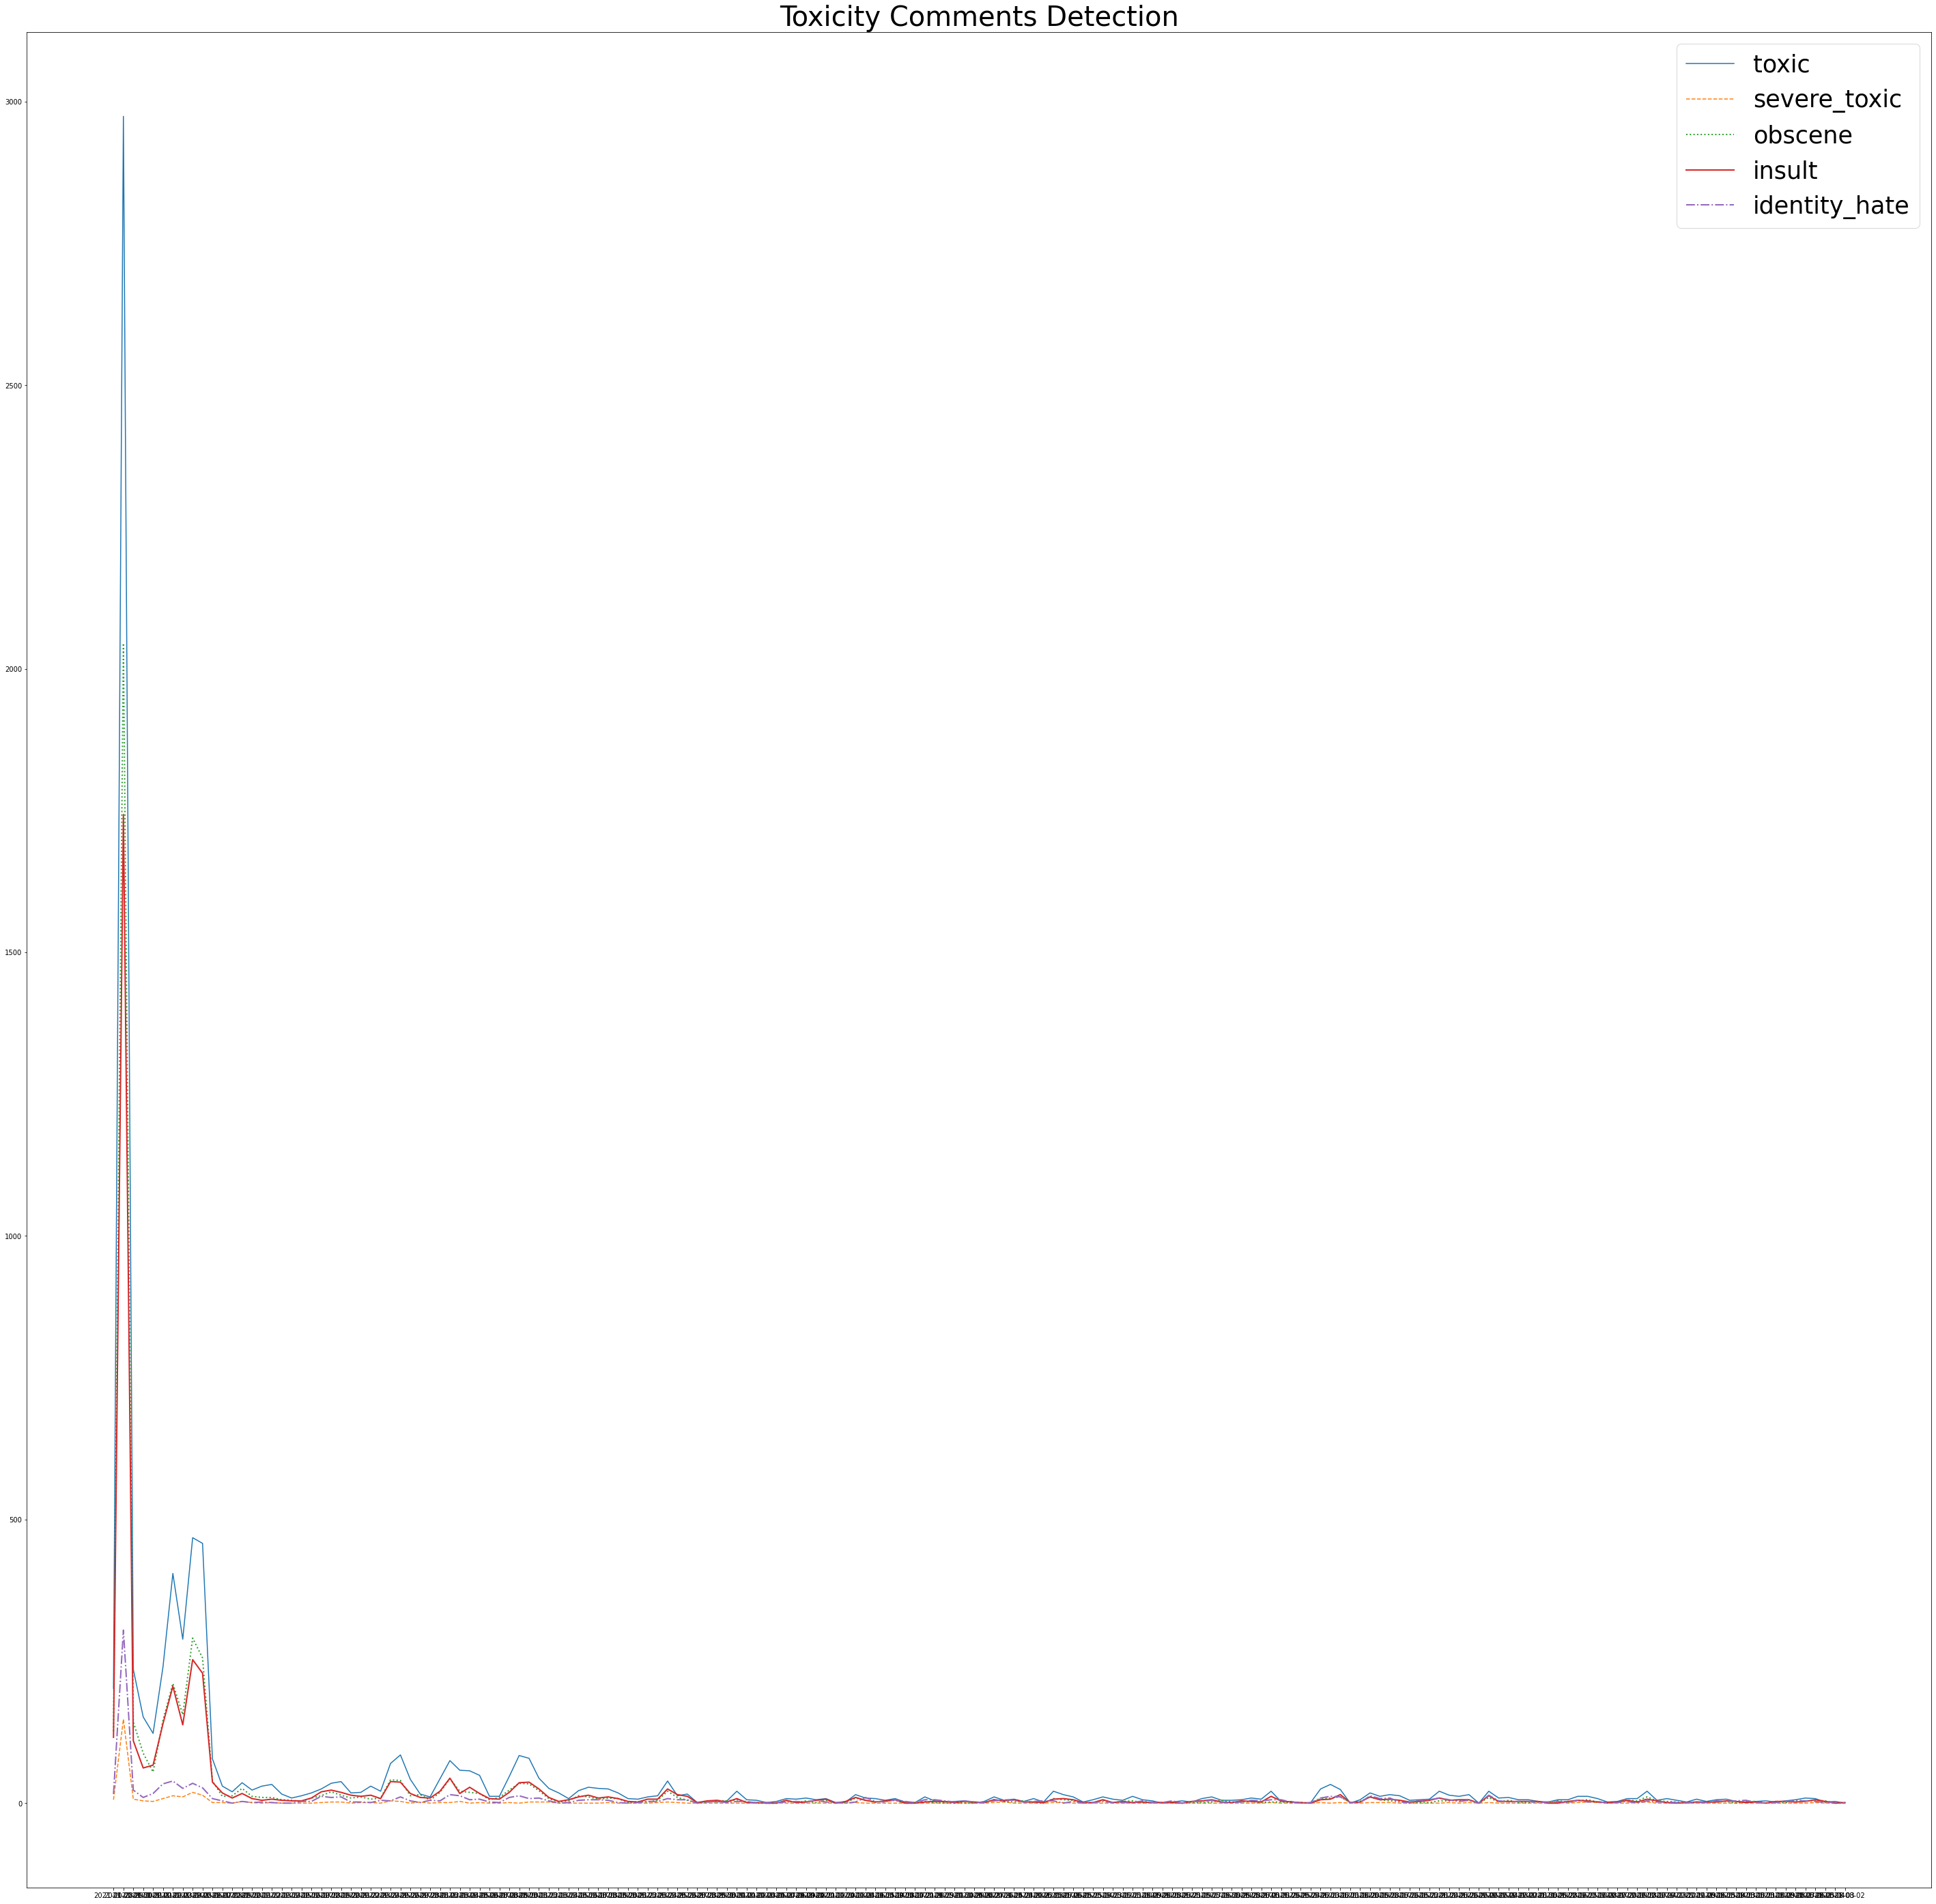

In [ ]:
plt.figure(figsize=(50,50))
plt.plot(x, y_toxic, label = "toxic", linestyle="-",  linewidth=1.5)
plt.plot(x, y_severe_toxic, label ='severe_toxic', linestyle="--", linewidth=1.5 )
plt.plot(x, y_obscene, label = "obscene", linestyle=":", linewidth=2)
plt.plot(x, y_insult, label = 'insult', linestyle = 'solid',  linewidth = 2)
plt.plot(x, y_identity_hate, label = 'identity_hate', linestyle = 'dashdot', linewidth = 2)
#plt.rcParams["figure.figsize"] = (70,50)
plt.legend(fontsize =35)
plt.title('Toxicity Comments Detection',fontsize=40) 